<h1>Exploratory Data Analysis</h1>
    <h2>          5 Yelp Datasets</h2>

<h3>Loding Libraries</h3>	

In [207]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
from nltk import FreqDist
from datetime import datetime
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
from textblob import TextBlob
import warnings
pd.options.mode.chained_assignment = None
%matplotlib inline


## The following is EDA part

<h3>1. Business Dataset</h3>	

In [208]:
%%time
# Read in sampled data
business = pd.read_csv('./sample_csv/business_sample.csv',low_memory=False)
print('rows:',len(business))
#creat a copy of the dataset
business_df = business.copy()

rows: 209393
Wall time: 58.2 s


### <span style="color:blue"> Initial check of the data</span>

### business_df

In [209]:
business_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN


In [210]:
business_df.shape

(209393, 14)

In [211]:
business_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [212]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209392 non-null  object 
 2   address       200714 non-null  object 
 3   city          209391 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   208884 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [213]:
business_df.business_id.is_unique

True

In [214]:
#remove closed business

In [215]:
business_df.groupby('is_open').size()


is_open
0     40490
1    168903
dtype: int64

In [216]:
business_df = business_df[business_df["is_open"]==1]

In [217]:
business_df.drop(columns = "is_open",inplace = True)

In [218]:
#drop irrelevat columns

In [219]:
business_df.drop(columns = ['address', 'postal_code','attributes','hours'],inplace = True)

In [220]:
#filter out non-US businesses

# US_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
#           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
#           "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
#           "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
#           "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
#business_df=business_df.loc[business_df['state'].isin(US_states)]
#business_df

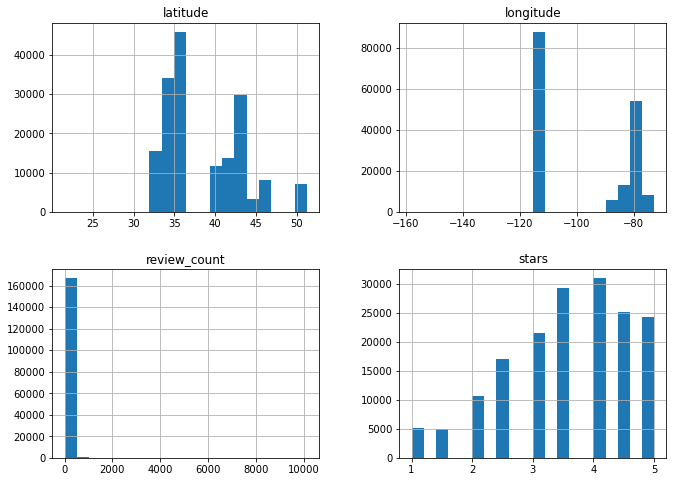

In [221]:
business_df.hist(bins=20, figsize=(11,8))
plt.show()

In [222]:
business_df.columns[business_df.isnull().any()].tolist()

['name', 'city', 'categories']

In [223]:
business_df.isnull().sum().sort_values(ascending=False)

categories      502
city              2
name              1
review_count      0
stars             0
longitude         0
latitude          0
state             0
business_id       0
dtype: int64

In [224]:
#drop NA rows if categories is missing

In [225]:
business_df.dropna(subset=["categories"],inplace = True)

In [226]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168401 entries, 0 to 209392
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   168401 non-null  object 
 1   name          168400 non-null  object 
 2   city          168399 non-null  object 
 3   state         168401 non-null  object 
 4   latitude      168401 non-null  float64
 5   longitude     168401 non-null  float64
 6   stars         168401 non-null  float64
 7   review_count  168401 non-null  int64  
 8   categories    168401 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 12.8+ MB


In [227]:
#lowercase city names

In [228]:
business_df['city'] = business_df['city'].str.lower() 

In [229]:
business_df[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:10]

,name,review_count,city,stars
81545,Bacchanal Buffet,10129,las vegas,4.0
118008,Mon Ami Gabi,9264,las vegas,4.0
147379,Wicked Spoon,7383,las vegas,3.5
83020,Hash House A Go Go,6751,las vegas,4.0
95962,Earl of Sandwich,5232,las vegas,4.5
22754,Yardbird Southern Table & Bar,4828,las vegas,4.5
205740,The Buffet At Wynn,4803,las vegas,3.5
145294,Secret Pizza,4803,las vegas,4.0
77432,The Cosmopolitan of Las Vegas,4740,las vegas,4.0
89281,Gordon Ramsay Hell's Kitchen,4672,las vegas,4.5


In [230]:
popular_city=business_df.groupby('city').size()
popular_city=popular_city.sort_values(ascending=False)
print(popular_city)

city
las vegas                                      25010
phoenix                                        16265
toronto                                        14932
charlotte                                       8484
scottsdale                                      7339
calgary                                         6754
pittsburgh                                      6095
mesa                                            5474
montréal                                        5356
henderson                                       4283
tempe                                           3677
chandler                                        3663
gilbert                                         3170
glendale                                        3151
cleveland                                       3070
mississauga                                     2988
madison                                         2883
peoria                                          1777
markham                                  

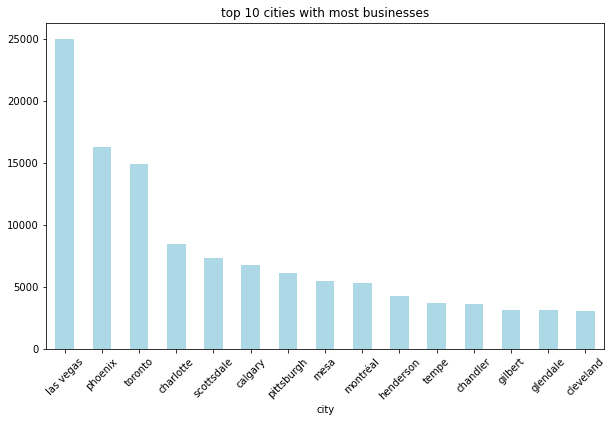

In [231]:
plt.rcParams['figure.figsize'] = [10, 6]
business_per_city=popular_city[0:15].plot.bar(x='city', y='number of streams' ,title = "top 10 cities with most businesses", rot=45,color = 'lightblue')

In [232]:
#remove cities which could be outliers

In [233]:
least_popular_city=business_df.groupby('city').size()
least_popular_city=least_popular_city.sort_values(ascending=True)
least_popular_city = least_popular_city[least_popular_city==1]
least_popular_city_df = pd.DataFrame(data=least_popular_city)
least_popular_city_list = least_popular_city_df.index.tolist()


In [234]:
business_df = business_df[~business_df['city'].isin(least_popular_city_list)]

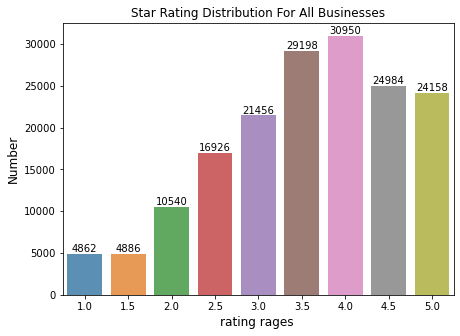

In [235]:
rating_business=business_df['stars'].value_counts().sort_index()

plt.figure(figsize=(7,5))
ax_business_rating= sns.barplot(rating_business.index, rating_business.values, alpha=0.8)
plt.title("Star Rating Distribution For All Businesses")
plt.ylabel('Number', fontsize=12)
plt.xlabel('rating rages ', fontsize=12)

rects = ax_business_rating.patches
labels = rating_business.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_business_rating.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


In [236]:
business_cat=' '.join(str(i) for i in business_df.categories)
Category=pd.DataFrame(business_cat.split(','),columns=['category'])
category_top_10 = Category.category.value_counts().sort_values(ascending=False).iloc[0:10]

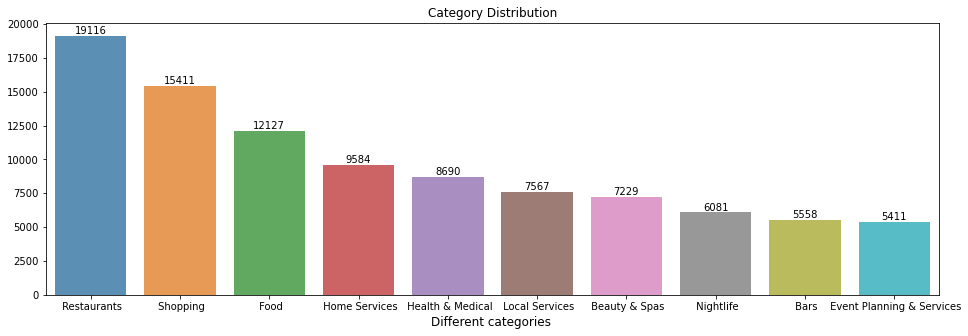

In [237]:
plt.rcParams['figure.figsize'] = [16, 5]
ax_category_top_10 = sns.barplot(category_top_10.index, category_top_10.values, alpha=0.8)
locs, labels = plt.xticks()
plt.title("Category Distribution")
plt.xlabel('Different categories ', fontsize=12)

rects = ax_category_top_10.patches
labels = category_top_10.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_category_top_10.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [238]:
most_review_business = business_df['name'].value_counts().sort_values(ascending = False).iloc[0:10]

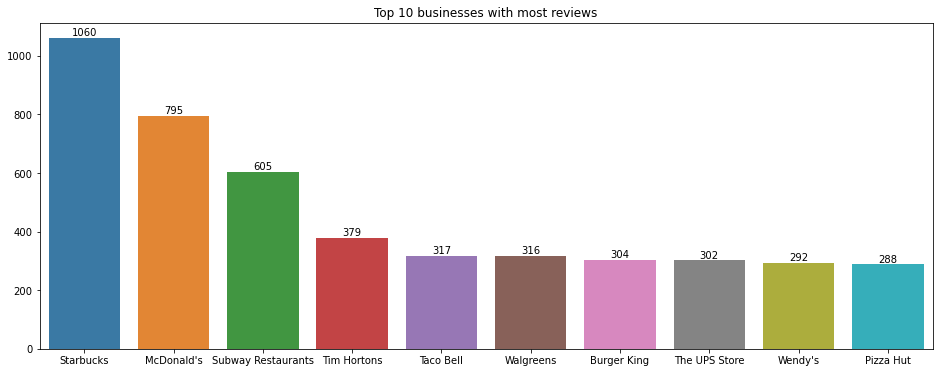

In [239]:
plt.figure(figsize=(16,6))
ax_most_review_business = sns.barplot(most_review_business.index, most_review_business.values, alpha=0.8)
sns.barplot(most_review_business.index, most_review_business.values, alpha=0.8).set_title("Top 10 businesses with most reviews")
locs, labels = plt.xticks()

rects = ax_most_review_business.patches
labels = most_review_business.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_most_review_business.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

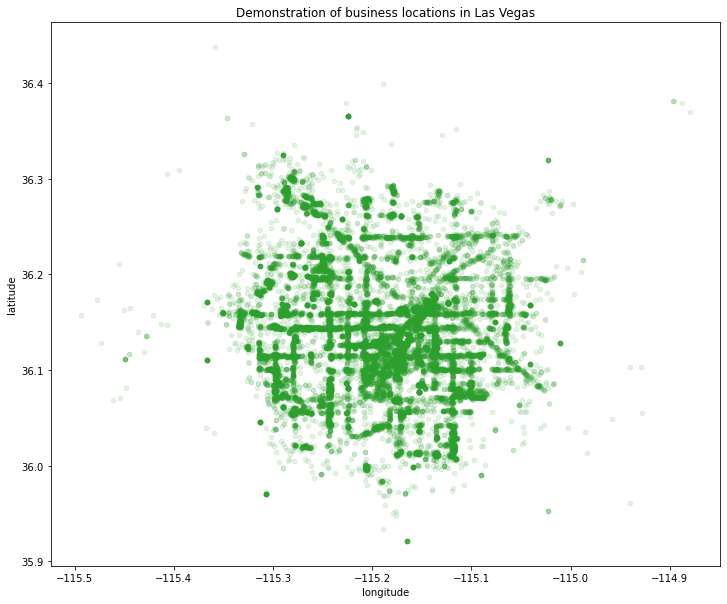

In [240]:
plt.rcParams['figure.figsize'] = [12, 10]
demo_vegas = business_df[business_df['city'].str.contains("vegas",na=False)] 
demo_vegas.plot(kind="scatter", x="longitude", y="latitude", title = "Demonstration of business locations in Las Vegas",alpha=0.12,color='tab:green')
plt.show()

In [241]:
neg_business = business_df[business_df["stars"]<=3]

In [242]:
negative_business_cat=' '.join(str(i) for i in neg_business.categories)
neg_category=pd.DataFrame(negative_business_cat.split(','),columns=['category'])
neg_category_top_10 = neg_category.category.value_counts().sort_values(ascending=False).iloc[0:10]

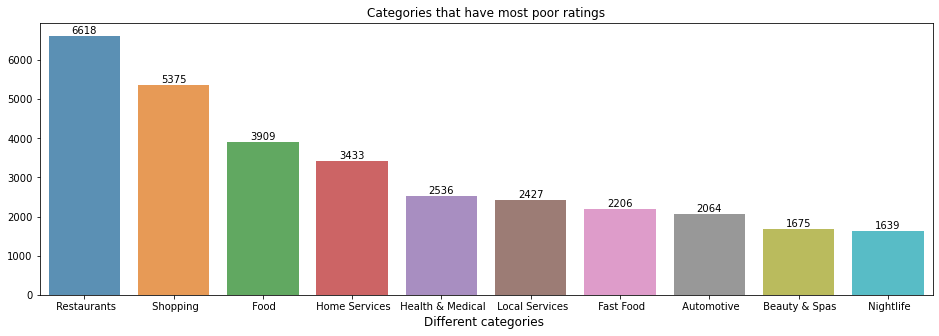

In [243]:
plt.rcParams['figure.figsize'] = [16, 5]
ax_neg_category_top_10 = sns.barplot(neg_category_top_10.index, neg_category_top_10.values, alpha=0.8)
locs, labels = plt.xticks()
plt.title("Categories that have most poor ratings")
plt.xlabel('Different categories ', fontsize=12)

rects = ax_neg_category_top_10.patches
labels = neg_category_top_10.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_neg_category_top_10.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Food-related businesses are the categories that have most poor ratings

In [244]:
business_df_food_related =  business_df[business_df['categories'].str.contains("Restaurants|Food",na=False)]
business_df_food_related.reset_index(inplace=True)

In [245]:
bottom_reviewed = business_df_food_related[business_df_food_related["stars"]<=3]
nagative_rating_ratio = len(bottom_reviewed) / len(business_df_food_related)
nagative_rating_ratio = round(nagative_rating_ratio,3)

print("Suprisingly, " + str(nagative_rating_ratio*100) + "%"+" food-related businesses have poor or neutral ratings (stars <=3)!")


Suprisingly, 35.699999999999996% food-related businesses have poor or neutral ratings (stars <=3)!


In [246]:
###       focus on restaturants

In [247]:
business_df_food_related.head(2)

,index,business_id,name,city,state,latitude,longitude,stars,review_count,categories
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo..."
1,12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,middleton,WI,43.105310,-89.510142,3.5,6,"Desserts, Food, Ice Cream & Frozen Yogurt"


Text(0.5, 1.0, 'Star distribution for food-related businesses')

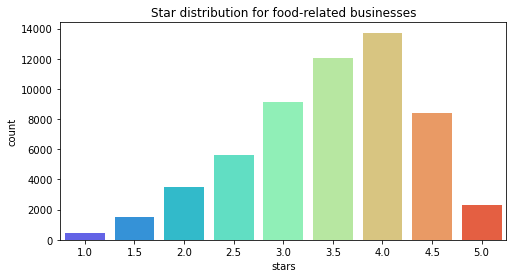

In [248]:
plt.figure(figsize=(8, 4))
restaurant_star_distribution = sns.countplot(x='stars',data=business_df_food_related,palette='rainbow')
restaurant_star_distribution.set_title("Star distribution for food-related businesses")

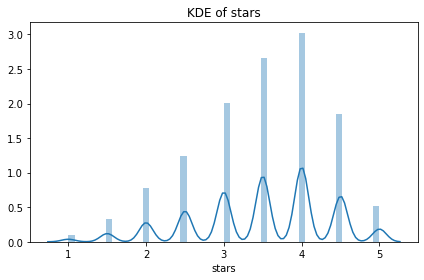

In [249]:
#Kernel Density Estimation (KDE) of stars
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(business_df_food_related['stars']).set_title('KDE of stars') #Kernel Density Estimation (KDE)
plt.tight_layout();

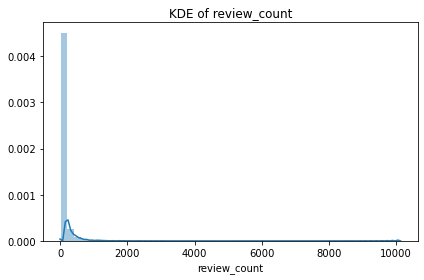

In [250]:
#Kernel Density Estimation (KDE) of review_count
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(business_df_food_related['review_count']).set_title('KDE of review_count') #Kernel Density Estimation (KDE)
plt.tight_layout()

In [251]:
#save to csv

In [252]:
business_df_food_related.to_csv('./cleaned_csv/business_df_food_related.csv', encoding='utf-8', index=False)

<h3>2. User Dataset</h3>	


In [253]:
%%time
# Read in sampled data
user = pd.read_csv('./sample_csv/user_sample.csv',low_memory=False)
print('rows:',len(user))
#creat a copy of the dataset
user_df = user.copy()

rows: 1968703
Wall time: 4min 45s


In [254]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### <span style="color:blue"> Initial check of the data</span>

### user_df

In [255]:
user_df.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0


In [256]:
user_df.shape

(1968703, 22)

In [257]:
user_df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [258]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968703 entries, 0 to 1968702
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 330.4+ MB


In [259]:
user_df.columns[user_df.isnull().any()].tolist()

['name', 'elite']

In [260]:
user_df.isnull().sum().sort_values(ascending=False)

elite                 1892742
name                        5
compliment_photos           0
compliment_writer           0
review_count                0
yelping_since               0
useful                      0
funny                       0
cool                        0
friends                     0
fans                        0
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
user_id                     0
dtype: int64

In [261]:
user_df.dropna(subset=['name'],inplace=True)

Explain what does "elite" mean

The Yelp Elite Squad is our way of recognizing people who are active in the Yelp community and role models on and off the Yelp site. 
Elite-worthiness is based on a number of things, including well-written reviews, high quality photos, a detailed personal profile, and a history of playing well with others

In [262]:
#count how many years a user has been an elite member of Yelp

user_df['elite_count'] = user_df['elite'].str.len()//4
user_df['elite_count'] = user_df['elite_count'].fillna(value=0)
user_df.drop(columns=["elite"],inplace=True)

In [263]:
#count how many friends a user has on Yelp

user_df['friend_count'] = user_df['friends'].str.len()//22
user_df['friend_count'] = user_df['friend_count'].fillna(value=0)
user_df.drop(columns=["friends"],inplace=True)

In [264]:
#how long a user has been using Yelp until 2020

user_df["yelping_length"] = pd.to_datetime(user_df['yelping_since'], errors='coerce')
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'], format = '%Y/%m/%d %H:%M:%S.%f')
user_df["yelping_length"] = 2020 - user_df['yelping_since'].dt.year 
user_df.drop(columns=["yelping_since"],inplace=True)

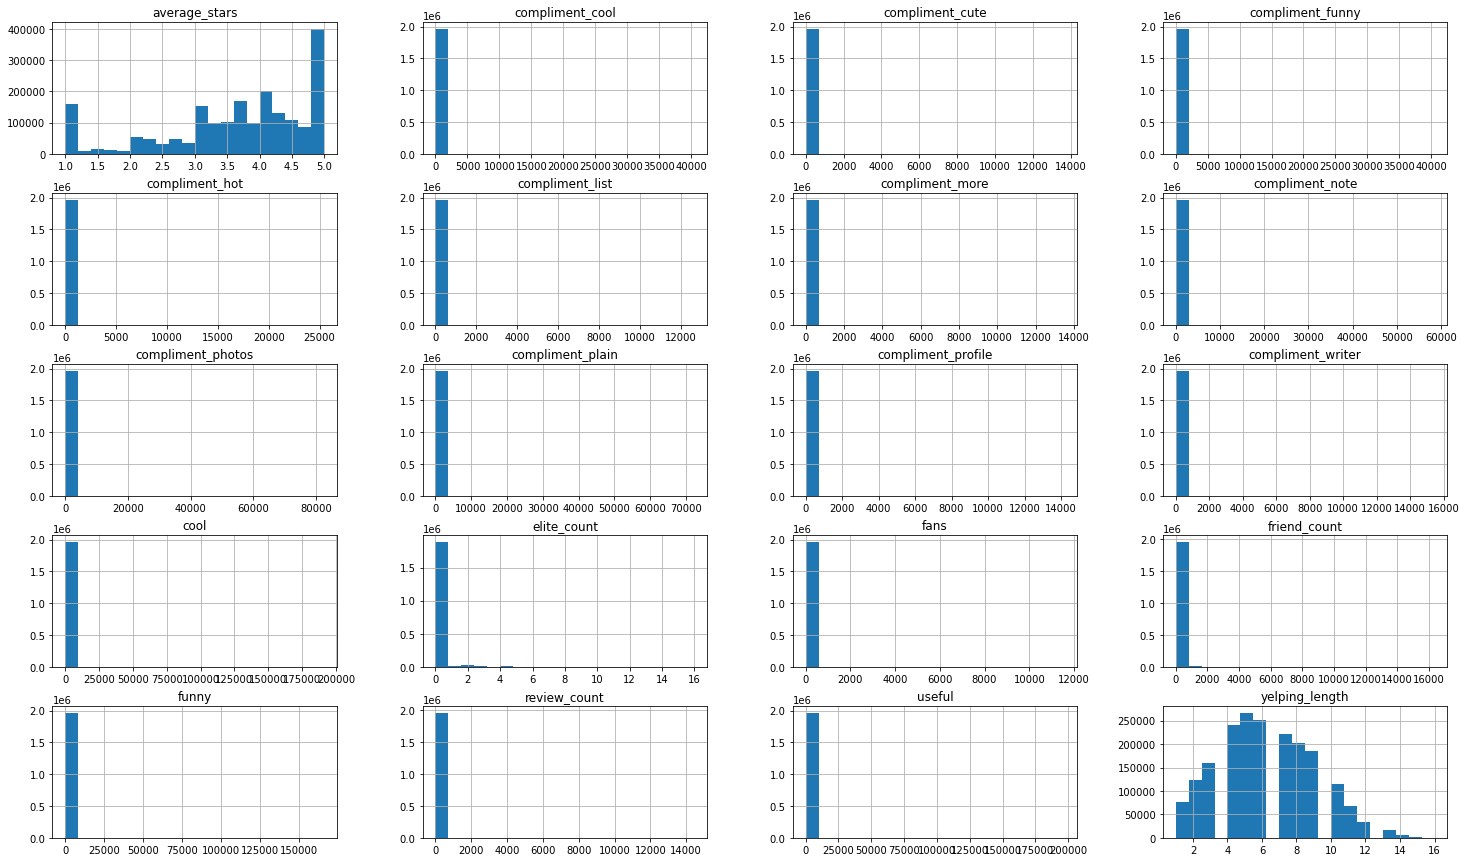

In [265]:
user_df.hist(bins=20, figsize=(25,15))
plt.show()

In [266]:
user_df.head()

,user_id,name,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_count,friend_count,yelping_length
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,628,225,227,14,3.57,3,2,1,0,1,11,15,22,22,10,0,0.0,49,13
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,790,316,400,27,3.84,36,4,5,2,1,33,37,63,63,21,5,7.0,232,12
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,151,125,103,5,3.44,9,6,0,1,0,3,7,17,17,4,1,1.0,38,12
3,QaELAmRcDc5TfJEylaaP8g,John,206,233,160,84,6,3.08,2,1,0,0,0,7,14,7,7,2,0,1.0,188,12
4,xvu8G900tezTzbbfqmTKvA,Anne,485,1265,400,512,78,4.37,8,9,2,1,1,22,28,31,31,19,31,11.0,976,12


In [267]:
#correlation between variables

Text(0.5, 1.0, 'Heatmap of Variables')

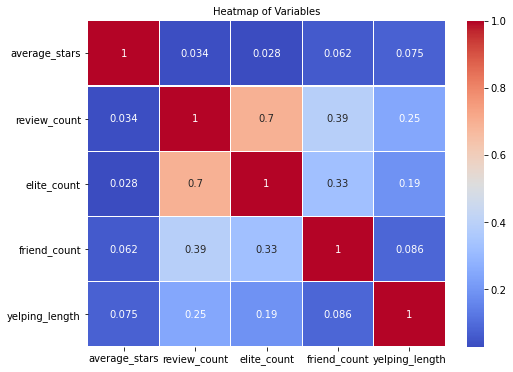

In [268]:
yelp_cor = user_df[['average_stars', 'review_count','elite_count', 'friend_count', 'yelping_length']].corr()

fig = plt.figure(figsize=(8,6))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=0.1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=10)

In [269]:
#find top 10 users who leave most reviews
frequent_review_user = user_df.sort_values(by=['review_count'],ascending = False)

frequent_review_user = frequent_review_user.iloc[0:10]


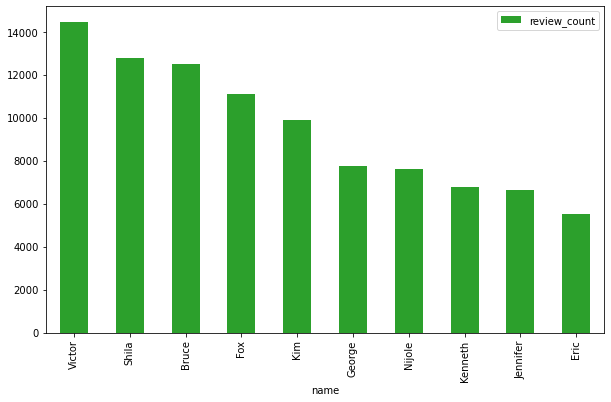

In [270]:
plt.rcParams['figure.figsize'] = [10, 6]
frequent_review_user_plot=frequent_review_user.plot.bar(x='name', y='review_count', rot=90,color = 'Tab:green')

In [271]:
user_df.head(1)

,user_id,name,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_count,friend_count,yelping_length
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,628,225,227,14,3.57,3,2,1,0,1,11,15,22,22,10,0,0.0,49,13


In [272]:
#compare active users and inactive users 
inactive_users =  user_df[(user_df.review_count <=4)] 
active_users =  user_df[(user_df.review_count >4)]

print("Number of inactive users is %s" % round(len(inactive_users.index), 2))
print("Inactive users' average stars is %s" % round(inactive_users.average_stars.mean(), 2))
print("Inactive users' average elite count is %s" % round(inactive_users.elite_count.mean(), 2))
print("Inactive users' average number of friends is %s" % round(inactive_users.friend_count.mean(), 2))
print("Inactive users' average number of years of Yelping is %s" % round(inactive_users.yelping_length.mean(), 2))

print("""...............
...............""")

print("Number of active users is %s" % round(len(active_users.index), 2))
print("Active users' average stars is %s" % round(active_users.average_stars.mean(), 2))
print("Active users' average elite count is %s" % round(active_users.elite_count.mean(), 2))
print("Active users' average number of friends is %s" % round(active_users.friend_count.mean(), 2))
print("Active users' average number of years of Yelping is %s" % round(active_users.yelping_length.mean(), 2))

Number of inactive users is 920808
Inactive users' average stars is 3.5
Inactive users' average elite count is 0.0
Inactive users' average number of friends is 37.41
Inactive users' average number of years of Yelping is 4.99
...............
...............
Number of active users is 1047890
Active users' average stars is 3.78
Active users' average elite count is 0.24
Active users' average number of friends is 72.42
Active users' average number of years of Yelping is 7.15


In [273]:
user_rating=user_df['average_stars'].value_counts().sort_index().sort_values(ascending = False).iloc[0:10].sort_index()
user_rating

1.00    159534
2.00     44367
2.33     27081
3.00    113081
3.50     34930
3.67     53113
4.00    106763
4.33     26360
4.50     40239
5.00    375187
Name: average_stars, dtype: int64

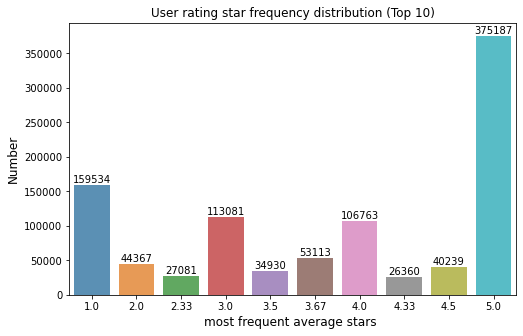

In [274]:

plt.figure(figsize=(8,5))
ax_user_rating= sns.barplot(user_rating.index, user_rating.values, alpha=0.8)
plt.title("User rating star frequency distribution (Top 10)")
plt.ylabel('Number', fontsize=12)
plt.xlabel('most frequent average stars ', fontsize=12)


#adding the text labels
rects = ax_user_rating.patches
labels = user_rating.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_user_rating.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

<h3>3. Checkin Dataset</h3>	

In [275]:
%%time
# Read in sampled data
checkin = pd.read_csv('./sample_csv/checkin_sample.csv',low_memory=False)
print('rows:',len(checkin))
#creat a copy of the dataset
checkin_df = checkin.copy()

rows: 175187
Wall time: 12.7 s


### <span style="color:blue"> Initial check of the data</span>

### checkin_df

In [276]:
checkin_df.head(5)

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [277]:
checkin_df = checkin_df['date'].str.count(',').add(1).groupby(checkin_df.business_id).sum()
checkin_df = checkin_df.to_frame()


In [278]:
checkin_df.rename(columns={'Unnamed: 0':'business_id','date': 'checkin_count'}, inplace=True )
checkin_df.reset_index()
checkin_df.head(2)

,checkin_count
business_id,
--1UhMGODdWsrMastO9DZw,7
--6MefnULPED_I942VcFNA,189


In [279]:
checkin_df.shape

(175187, 1)

In [280]:
checkin_df.columns

Index(['checkin_count'], dtype='object')

In [281]:
checkin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175187 entries, --1UhMGODdWsrMastO9DZw to zzzaIBwimxVej4tY6qFOUQ
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   checkin_count  175187 non-null  int64
dtypes: int64(1)
memory usage: 2.7+ MB


In [282]:
checkin_df.isnull().sum().sort_values(ascending=False)

checkin_count    0
dtype: int64

In [283]:
checkin_df.head(5)

,checkin_count
business_id,
--1UhMGODdWsrMastO9DZw,7
--6MefnULPED_I942VcFNA,189
--7zmmkVg-IMGaXbuVd0SQ,193
--8LPVSo5i0Oo61X01sV9A,1
--9QQLMTbFzLJ_oT-ON3Xw,38


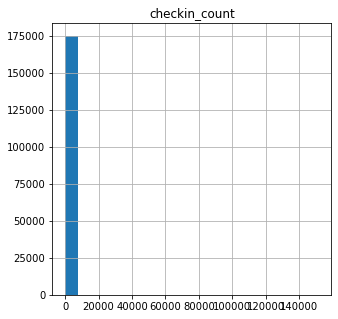

In [284]:
checkin_df.hist(bins=20, figsize=(5,5))
plt.show()

In [285]:
business_df_food_related = pd.read_csv('./cleaned_csv/business_df_food_related.csv',low_memory=False)


In [286]:
business_checkin_merge= pd.merge(business_df_food_related, checkin_df, on='business_id')


In [287]:
business_checkin_merge.head(5)

,index,business_id,name,city,state,latitude,longitude,stars,review_count,categories,checkin_count
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",3
1,12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,middleton,WI,43.105310,-89.510142,3.5,6,"Desserts, Food, Ice Cream & Frozen Yogurt",13
2,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,aurora,ON,44.010962,-79.448677,4.5,4,"Restaurants, Cheesesteaks, Poutineries",1
3,25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,thornhill,ON,43.820492,-79.398466,4.5,7,"Japanese, Fast Food, Food Court, Restaurants",8
4,30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,richmond hill,ON,43.947011,-79.454862,3.0,3,"Persian/Iranian, Turkish, Middle Eastern, Rest...",2


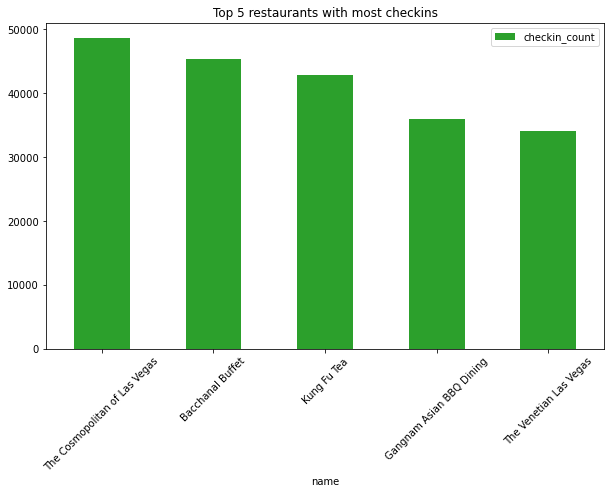

In [288]:
frequent_checkin_business = business_checkin_merge.sort_values(by = 'checkin_count',ascending=False)
plt.rcParams['figure.figsize'] = [10, 6]

frequent_checkin_business_bar_plot=frequent_checkin_business[0:5].plot.bar( y='checkin_count',x = "name", 
                                                                           title = "Top 5 restaurants with most checkins",rot=45,color='Tab:green')

In [289]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [290]:
frequent_checkin_business.head(1)

,index,business_id,name,city,state,latitude,longitude,stars,review_count,categories,checkin_count
20523,77432,5LNZ67Yw9RD6nf4_UhXOjw,The Cosmopolitan of Las Vegas,las vegas,NV,36.109755,-115.173877,4.0,4740,"Arts & Entertainment, Casinos, Hotels & Travel...",48606


In [291]:
#plot the top 10 cities with most checkins
most_checkin_city = business_checkin_merge.groupby(["name","city"]).size().sort_values(ascending = True)
most_checkin_city_df= pd.DataFrame(data =most_checkin_city,columns = ['checkin_count']).reset_index()
most_checkin_city_plot = most_checkin_city_df.city.value_counts(ascending = False).iloc[0:10]

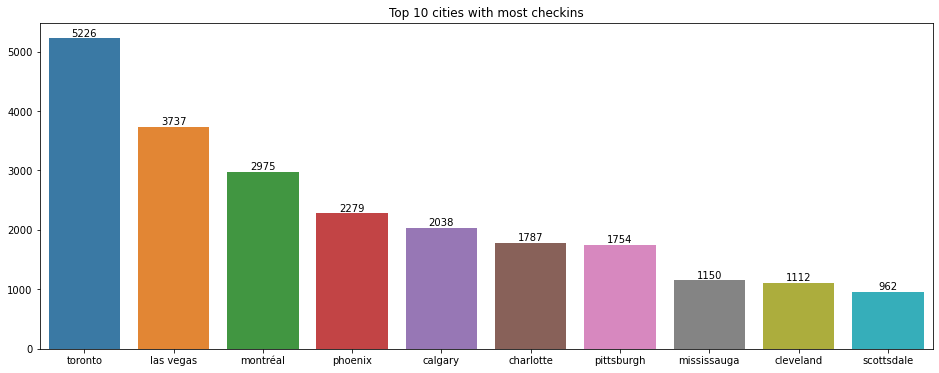

In [292]:
plt.figure(figsize=(16,6))
ax_most_checkin_city_plot = sns.barplot(most_checkin_city_plot.index, most_checkin_city_plot.values, alpha=0.8)
sns.barplot(most_checkin_city_plot.index, most_checkin_city_plot.values, alpha=0.8).set_title( "Top 10 cities with most checkins")
locs, labels = plt.xticks()

rects = ax_most_checkin_city_plot.patches
labels = most_checkin_city_plot.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_most_checkin_city_plot.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

### 4. Tip Dataset


In [293]:
%%time
# Read in sampled data
tip = pd.read_csv('./sample_csv/tip_sample.csv',low_memory=False)

print('rows:',len(tip))
#creat a copy of the dataset
tip_df = tip.copy()

rows: 1320761
Wall time: 2min 54s


### <span style="color:blue"> Initial check of the data</span>

### tip_df

It is worth mentioning that "tip" in Yelp does not mean "compliment reviews" or monetary rewards; it means key information about a business. It usually contains less information than a review.

In [294]:
tip_df.head(2)

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0


In [295]:
tip_df.rename(columns={"text": "tip_text", "date": "tip_date"},inplace = True)

In [296]:
tip_df.shape

(1320761, 5)

In [297]:
tip_df.columns

Index(['user_id', 'business_id', 'tip_text', 'tip_date', 'compliment_count'], dtype='object')

In [298]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320761 entries, 0 to 1320760
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1320761 non-null  object
 1   business_id       1320761 non-null  object
 2   tip_text          1320753 non-null  object
 3   tip_date          1320761 non-null  object
 4   compliment_count  1320761 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 50.4+ MB


In [299]:
tip_df.columns[tip_df.isnull().any()].tolist()

['tip_text']

In [300]:
tip_df.isnull().sum().sort_values(ascending=False)

tip_text            8
compliment_count    0
tip_date            0
business_id         0
user_id             0
dtype: int64

In [301]:
tip_df.dropna(inplace=True)


In [302]:
tip_df.head(2)

,user_id,business_id,tip_text,tip_date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0


In [303]:
tip_df['tip_text_length'] = tip_df['tip_text'].apply(len)
tip_df.head()

,user_id,business_id,tip_text,tip_date,compliment_count,tip_text_length
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,20
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,29
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,32
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,42
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,77


Text(0.5, 1.0, 'Tip tip_text_length Histogram')

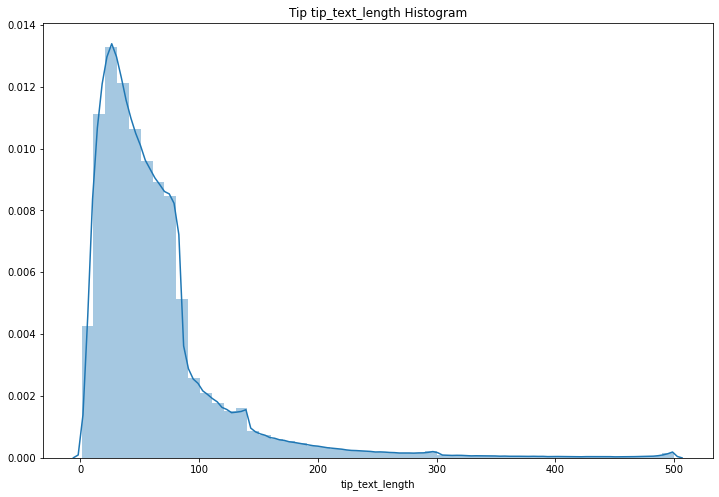

In [304]:
# tip_text_length
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(tip_df['tip_text_length'], kde=True, bins=50)
plt.title('Tip tip_text_length Histogram')


In [305]:
tip_df["tip_text_length"].median()

49.0

In [306]:
tip_df["tip_text_length"].mean()

63.3453999347342

In [307]:
#filter out stop_words
# STOP_WORDS = list(get_stop_words('en'))         #About 900 stopwords
# should_remove = ["I","they","The","the","that","That","This","this","&","!","go","get"]
# STOP_WORDS.extend(should_remove)

In [308]:
# tip_copy['tip_text'] = tip_copy['tip_text'].apply(lambda x: " ".join(word for word in x.split() if word not in STOP_WORDS))

In [309]:
from collections import Counter
top20_tip_word = Counter(" ".join(tip_df['tip_text'].str.lower()).split()).most_common(20)
top20_tip_word

[('the', 614762),
 ('and', 440958),
 ('a', 296192),
 ('is', 262070),
 ('to', 261484),
 ('for', 207629),
 ('great', 191954),
 ('i', 169431),
 ('in', 158563),
 ('of', 147056),
 ('you', 128027),
 ('this', 123138),
 ('was', 112199),
 ('they', 110114),
 ('good', 107200),
 ('on', 107195),
 ('food', 104063),
 ('with', 102666),
 ('are', 99123),
 ('my', 98463)]

In [310]:
top20_tip_word = pd.DataFrame(top20_tip_word)

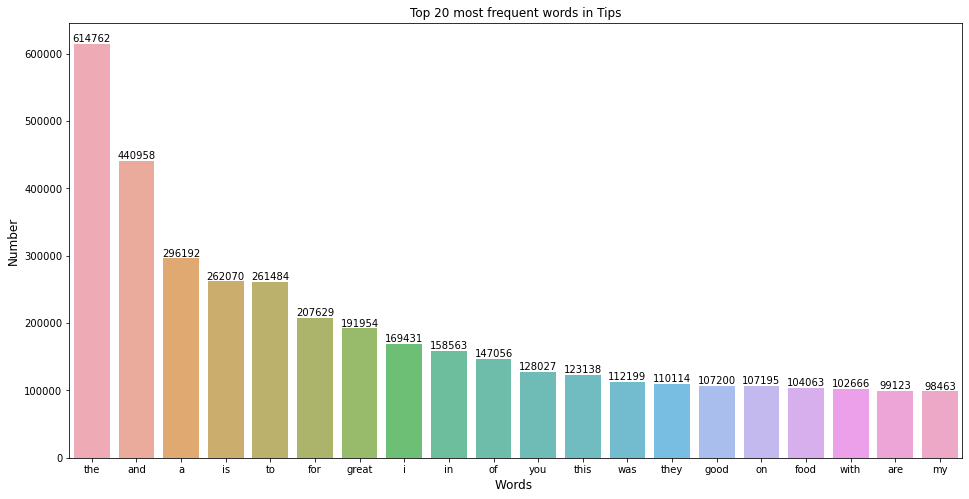

In [311]:

plt.figure(figsize=(16,8))
ax_top20= sns.barplot( top20_tip_word[0],top20_tip_word[1], alpha=0.8)
plt.title("Top 20 most frequent words in Tips")
plt.ylabel('Number', fontsize=12)
plt.xlabel('Words ', fontsize=12)

rects = ax_top20.patches
labels = top20_tip_word[1]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_top20.text(rect.get_x() + rect.get_width()/2, height + 6, label, ha='center', va='bottom')

plt.show()


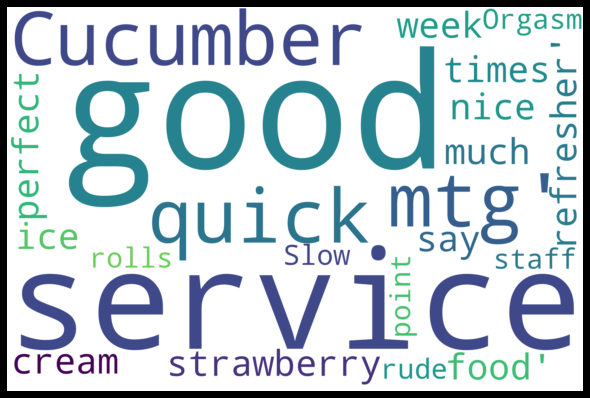

In [312]:
#word cloud
yelp_tip_text = tip_df['tip_text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(yelp_tip_text))

fig = plt.figure(
    figsize = (8, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [313]:
#define polarity fuction
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
tip_df['polarity'] = tip_df.tip_text.apply(detect_polarity)

In [314]:
#define subjectivity fuction
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
tip_df['subjectivity'] = tip_df.tip_text.apply(detect_subjectivity)

In [315]:
tip_df.head(2)

,user_id,business_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,20,0.333333,0.5
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,29,0.000000,0.0


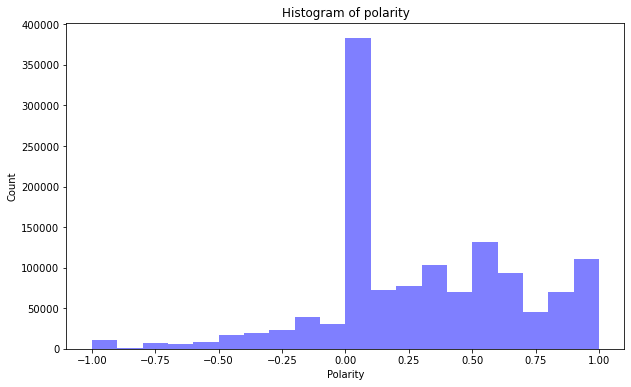

In [316]:
#Distribution of Polarity

num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tip_df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [317]:
tip_df.polarity.median()


0.25

In [318]:
tip_df.polarity.mode()

0    0.0
dtype: float64

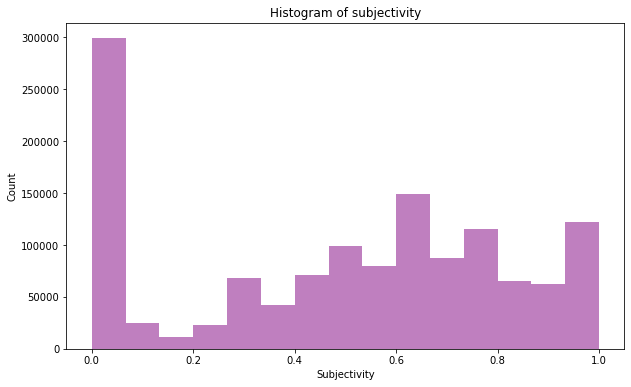

In [320]:
#Distribution of Subjectivity

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tip_df.subjectivity, num_bins, facecolor='purple', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of subjectivity')
plt.show();

In [321]:
tip_df.subjectivity.median()


0.55

In [322]:
#check polarity without neutral tips

In [323]:
tip_without_0_polarity = tip_df[tip_df["polarity"]!=0]

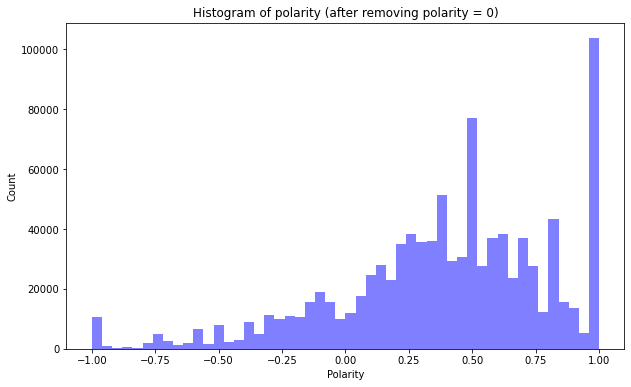

In [324]:
#Distribution of Polarity (without polarity = 0) 

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tip_without_0_polarity.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity (after removing polarity = 0)')
plt.show();

In [325]:
#merge tip dataframe with business_df_food_related dataframe

In [326]:
business_df_food_related = pd.read_csv('./cleaned_csv/business_df_food_related.csv',low_memory=False)

In [327]:
business_df_food_related.head(2)

,index,business_id,name,city,state,latitude,longitude,stars,review_count,categories
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo..."
1,12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,middleton,WI,43.105310,-89.510142,3.5,6,"Desserts, Food, Ice Cream & Frozen Yogurt"


In [328]:
tip_df.head(2)

,user_id,business_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,20,0.333333,0.5
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,29,0.000000,0.0


In [329]:
#merge with business_df_food_related

In [330]:
business_tip_merge= pd.merge(business_df_food_related, tip_df, on='business_id')


In [331]:
business_tip_merge.drop(columns=['index'],inplace = True)

In [332]:
business_tip_merge.head(2)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,user_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity
0,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,gastonia,NC,35.252842,-81.152698,3.5,3,"Hotels & Travel, Transportation, Taxis, Beer, ...",r1ZKGRxr05e0otkssLQZAA,"Awesome service got me and my car home, the dr...",2016-05-15 12:30:50,0,74,0.466667,0.433333
1,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,thornhill,ON,43.820492,-79.398466,4.5,7,"Japanese, Fast Food, Food Court, Restaurants",kmzYKcAL2AGmAnlCF8UitA,The owners are really kind and cute,2018-07-24 21:10:31,0,35,0.550000,0.950000


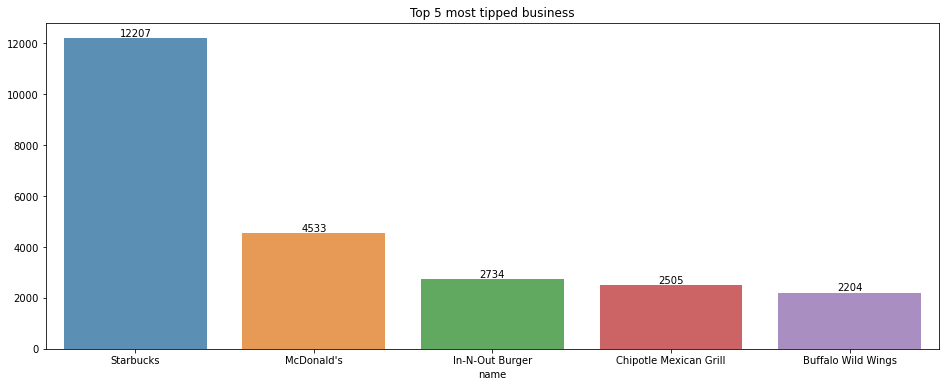

In [333]:
#Top 5 businesses that receive most tips
most_tipped_business = business_tip_merge.groupby(["name"])["tip_text"].count().sort_values(ascending = False)
most_tipped_business_plot=most_tipped_business[0:5]

plt.figure(figsize=(16,6))
ax_most_tipped_business_plot = sns.barplot(most_tipped_business_plot.index, most_tipped_business_plot.values, alpha=0.8)
ax_most_tipped_business_plot.set_title("Top 5 most tipped business")
locs, labels = plt.xticks()

rects = ax_most_tipped_business_plot.patches
labels = most_tipped_business_plot.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_most_tipped_business_plot.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

In [334]:
#tip date visualization
business_tip_merge['tip_date'] = pd.to_datetime(business_tip_merge['tip_date'])
business_tip_merge['tip_date'] = pd.to_datetime(business_tip_merge['tip_date'], format='%Y%m%d')
business_tip_merge['year_tip'] = business_tip_merge.tip_date.dt.to_period('Y')
business_tip_merge['month_tip'] = business_tip_merge.tip_date.dt.to_period('M')

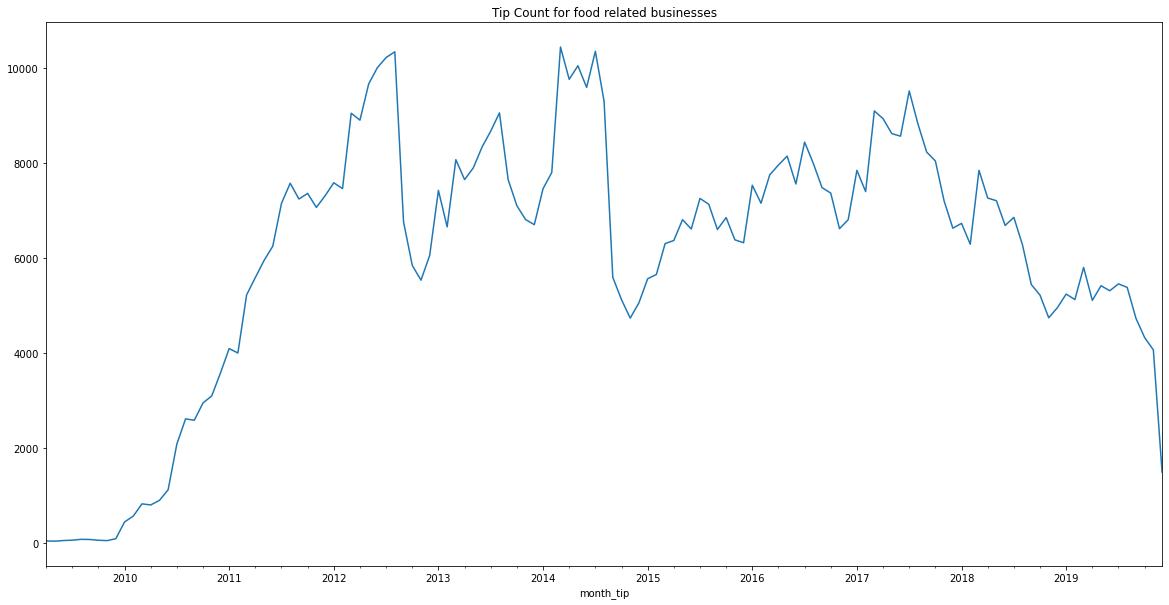

In [335]:
#Tip per year and month for food-related businesses

tip_count_per_year = business_tip_merge.groupby(['month_tip'])['business_id'].count()

ts = pd.Series(tip_count_per_year)
ts.plot(kind='line', figsize=(20,10),title='Tip Count for food related businesses')
plt.show()

In [336]:
# in total, there are 4873 food-related businesses receive only 1 tip ever

least_tipped_business = business_tip_merge.groupby(["name"])["tip_text"].size().sort_values(ascending = True)
least_tipped_business[least_tipped_business==1].count()

4873

In [337]:
#plot the top 10 cities with businesses having fewest tips
least_tipped_business_city = business_tip_merge.groupby(["name","city"]).size().sort_values(ascending = True)
least_tipped_business_city_df= pd.DataFrame(data =least_tipped_business_city,columns = ['tip_count']).reset_index()
least_tipped_city = least_tipped_business_city_df[least_tipped_business_city_df.tip_count==1].city.value_counts(ascending = False).iloc[0:10]

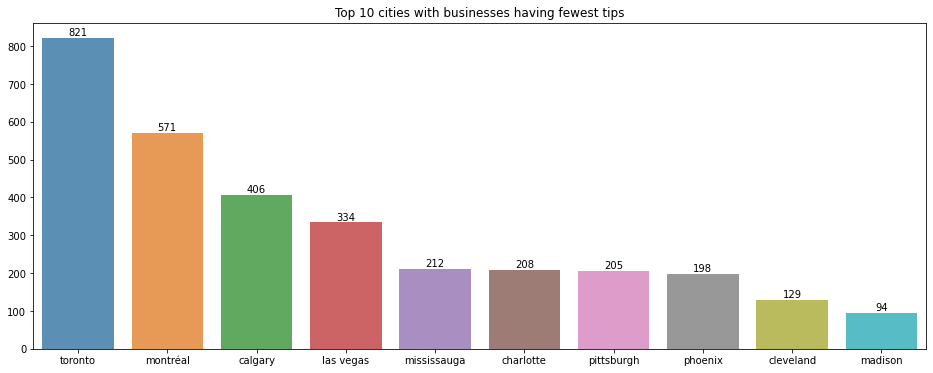

In [338]:
plt.figure(figsize=(16,6))
ax_least_tipped_city = sns.barplot(least_tipped_city.index, least_tipped_city.values, alpha=0.8)
ax_least_tipped_city.set_title("Top 10 cities with businesses having fewest tips")
locs, labels = plt.xticks()

rects = ax_least_tipped_city.patches
labels = least_tipped_city.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_least_tipped_city.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

In [339]:
tip_cat=' '.join(str(i) for i in business_tip_merge.categories)
biz_category=pd.DataFrame(tip_cat.split(','),columns=['category'])
tip_category_top_10 = biz_category.category.value_counts().sort_values(ascending=False).iloc[0:10]

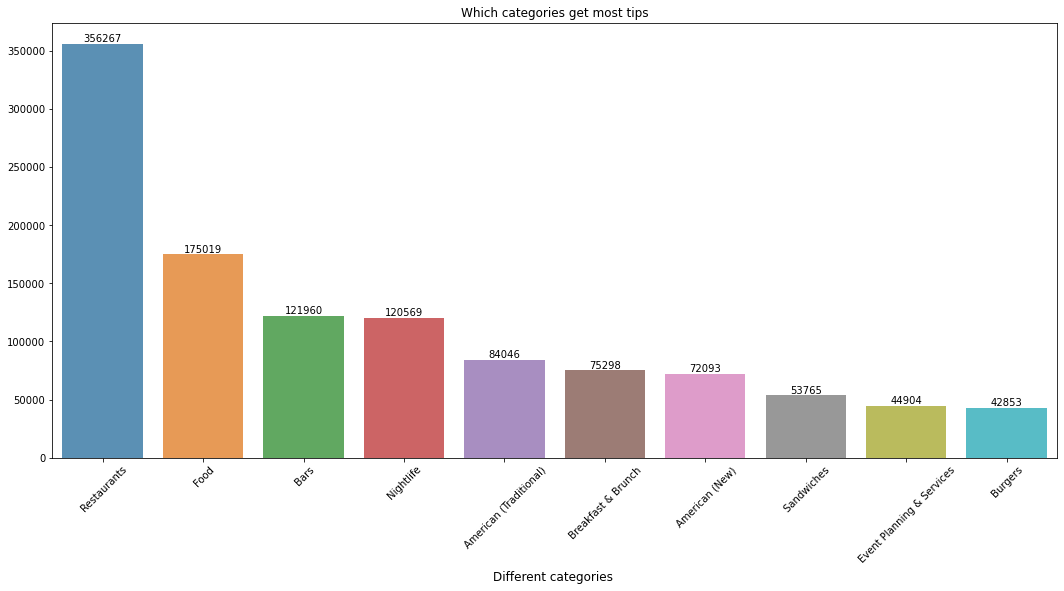

In [340]:
plt.rcParams['figure.figsize'] = [18, 8]
ax_tip_category_top_10 = sns.barplot(tip_category_top_10.index, tip_category_top_10.values, alpha=0.8)
locs, labels = plt.xticks()
plt.title("Which categories get most tips")
plt.xlabel('Different categories ', fontsize=12)

rects = ax_tip_category_top_10.patches
labels = tip_category_top_10.values
plt.setp(ax_tip_category_top_10.get_xticklabels(), rotation=45)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_tip_category_top_10.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [341]:
business_tip_merge.shape

(782164, 18)

In [342]:
business_tip_merge.head(3)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,user_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity,year_tip,month_tip
0,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,gastonia,NC,35.252842,-81.152698,3.5,3,"Hotels & Travel, Transportation, Taxis, Beer, ...",r1ZKGRxr05e0otkssLQZAA,"Awesome service got me and my car home, the dr...",2016-05-15 12:30:50,0,74,0.466667,0.433333,2016,2016-05
1,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,thornhill,ON,43.820492,-79.398466,4.5,7,"Japanese, Fast Food, Food Court, Restaurants",kmzYKcAL2AGmAnlCF8UitA,The owners are really kind and cute,2018-07-24 21:10:31,0,35,0.550000,0.950000,2018,2018-07
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,thornhill,ON,43.820492,-79.398466,4.5,7,"Japanese, Fast Food, Food Court, Restaurants",dSTRQSeCqMTbs7l8KF_xJg,If the roll you want isn't already made tell t...,2015-04-16 05:30:33,0,76,0.375000,0.500000,2015,2015-04


In [343]:
#save to csv

In [344]:
business_tip_merge.to_csv('./cleaned_csv/business_tip_merge.csv', encoding='utf-8', index=False)


### 5. Review Dataset
### "restaurant_review_df" creation &  EDA


How i created "restaurant_review_df"?

1. Data filter on business_df
2. Create "business_df_food_related"
3. Merge "business_df_food_related" with "review_df" to be "restaurant_review_df"


In [162]:
%%time
review_df = pd.read_csv('./sample_csv/review_sample.csv',low_memory=False)
print('review_df rows:',len(review_df))


review_df rows: 8021122
Wall time: 1min 43s


### <span style="color:blue"> Initial check of Review DataFrame</span>

In [163]:
review_df.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52


In [164]:
review_df.shape

(8021122, 9)

In [165]:
review_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [166]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 550.8+ MB


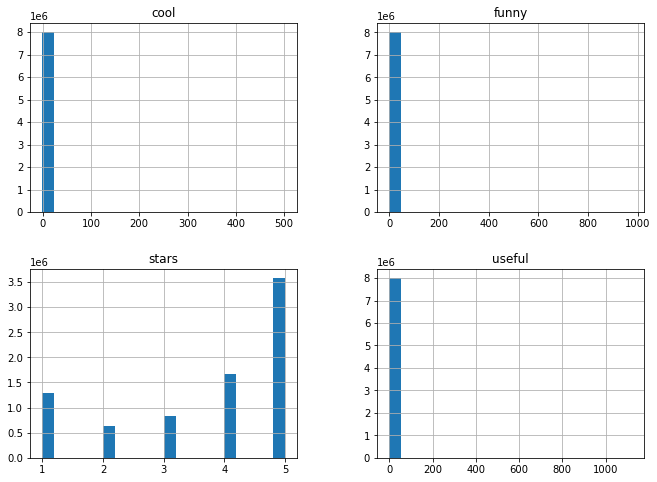

In [167]:
review_df.hist(bins=20, figsize=(11,8))
plt.show()

In [168]:
review_df.isnull().sum().sort_values(ascending=False)

text           2
date           0
cool           0
funny          0
useful         0
stars          0
business_id    0
user_id        0
review_id      0
dtype: int64

In [169]:
review_df.dropna(inplace = True) #remove NaN reviews
review_df.isnull().sum().sort_values(ascending=False)

date           0
text           0
cool           0
funny          0
useful         0
stars          0
business_id    0
user_id        0
review_id      0
dtype: int64

In [170]:
review_df.shape

(8021120, 9)

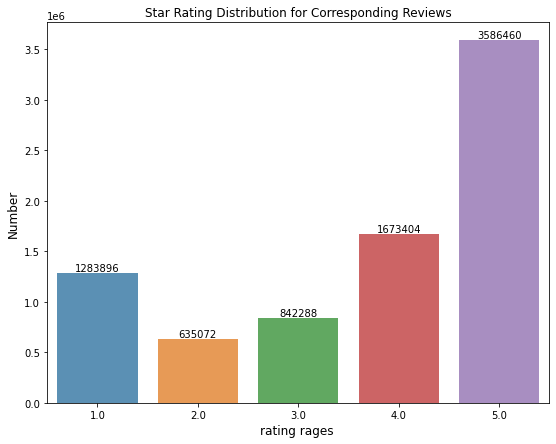

In [171]:
rating_business=review_df['stars'].value_counts().sort_index()

plt.figure(figsize=(9,7))
ax_business_rating= sns.barplot(rating_business.index, rating_business.values, alpha=0.8)
plt.title("Star Rating Distribution for Corresponding Reviews")
plt.ylabel('Number', fontsize=12)
plt.xlabel('rating rages ', fontsize=12)

#adding the text labels
rects = ax_business_rating.patches
labels = rating_business.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_business_rating.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Text(0.5, 1.0, 'Review tip_text_length Histogram')

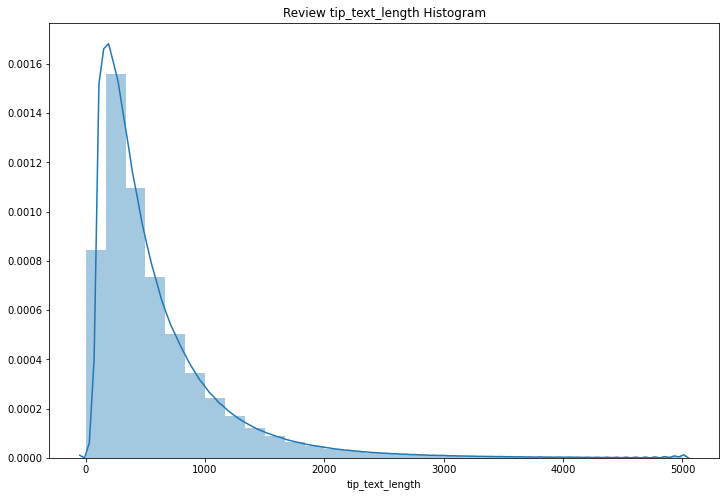

In [172]:
#review text legth
review_copy = review_df.copy()
review_copy['review_text_length'] = review_copy['text'].apply(len)
review_copy.head(1)

# tip_text_length
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(review_copy['review_text_length'], kde=True, bins=30)
plt.title('Review text length Histogram')

In [173]:
print(review_copy["review_text_length"].median())


417.0


In [174]:
print(review_copy["review_text_length"].mean())

591.7149940407324


#### filter out non-restaurants reviews <based on EDA on Business DataFrame (the 1st EDA)>

In [175]:
business_df_food_related = pd.read_csv('./cleaned_csv/business_df_food_related.csv',low_memory=False)

In [176]:
print('business_df_food_related rows:',len(business_df_food_related))


business_df_food_related rows: 56750


In [177]:
restaurant_reviews = review_df[review_df.business_id.isin(business_df_food_related['business_id'])]

In [178]:
restaurant_reviews.shape

(4602656, 9)

In [179]:
restaurant_review_df = pd.merge(business_df_food_related, restaurant_reviews, on = 'business_id')

In [180]:
restaurant_review_df.rename(columns={'stars_x':'business_avg_star','stars_y':'review_star'}, inplace=True)

In [181]:
restaurant_review_df['review_year'] = restaurant_review_df['date'].apply(lambda x:int(x[:4])) # COVERT DATE TO YEAR

In [182]:
restaurant_review_df.head(1)

,index,business_id,name,city,state,latitude,longitude,business_avg_star,review_count,categories,review_id,user_id,review_star,useful,funny,cool,text,date,review_year
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",2TtLt9skrBwBM6QGEhFYCg,eSQ3z93DlzkpXK_H6MFEMw,5.0,0,0,0,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15,2013


In [183]:
restaurant_review_df.shape

(4602656, 19)

#### EDA on restaurant_review_df

In [184]:
restaurant_review_df.head(1)

,index,business_id,name,city,state,latitude,longitude,business_avg_star,review_count,categories,review_id,user_id,review_star,useful,funny,cool,text,date,review_year
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",2TtLt9skrBwBM6QGEhFYCg,eSQ3z93DlzkpXK_H6MFEMw,5.0,0,0,0,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15,2013


In [185]:
#check na value
restaurant_review_df.isnull().values.any()


False

In [186]:
restaurant_review_df.shape


(4602656, 19)

In [187]:
restaurant_review_df.columns


Index(['index', 'business_id', 'name', 'city', 'state', 'latitude',
       'longitude', 'business_avg_star', 'review_count', 'categories',
       'review_id', 'user_id', 'review_star', 'useful', 'funny', 'cool',
       'text', 'date', 'review_year'],
      dtype='object')

In [188]:
restaurant_review_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4602656 entries, 0 to 4602655
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   index              int64  
 1   business_id        object 
 2   name               object 
 3   city               object 
 4   state              object 
 5   latitude           float64
 6   longitude          float64
 7   business_avg_star  float64
 8   review_count       int64  
 9   categories         object 
 10  review_id          object 
 11  user_id            object 
 12  review_star        float64
 13  useful             int64  
 14  funny              int64  
 15  cool               int64  
 16  text               object 
 17  date               object 
 18  review_year        int64  
dtypes: float64(4), int64(6), object(9)
memory usage: 702.3+ MB


In [189]:
#distribution of reviews by star
distribution_review_star = restaurant_review_df.groupby(['review_star'])['review_id'].size().reset_index()
distribution_review_star

,review_star,review_id
0,1.0,569196
1,2.0,392529
2,3.0,556689
3,4.0,1118662
4,5.0,1965580


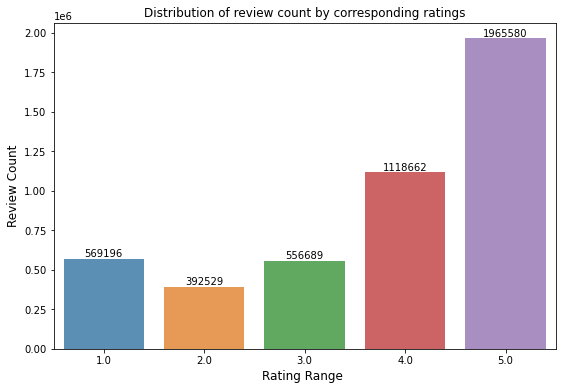

In [190]:
plt.figure(figsize=(9,6))
ax_distribution_review_star= sns.barplot(distribution_review_star.review_star, distribution_review_star.review_id, alpha=0.8)
plt.title("Distribution of review count by corresponding ratings")
plt.ylabel('Review Count', fontsize=12)
plt.xlabel('Rating Range ', fontsize=12)

#adding the text labels
rects = ax_distribution_review_star.patches
labels = distribution_review_star.review_id
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_distribution_review_star.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [191]:
restaurant_review_df['date'] = pd.to_datetime(restaurant_review_df['date'])
least_recent_date = restaurant_review_df['date'].min()
recent_date = restaurant_review_df['date'].max()

In [192]:
print(recent_date)

2019-12-13 15:50:49


In [193]:
print(least_recent_date)

2004-10-19 09:07:15


In [194]:
#distribution of reviews by year
review_by_year = restaurant_review_df.groupby(['review_year'])['review_id'].size().reset_index()

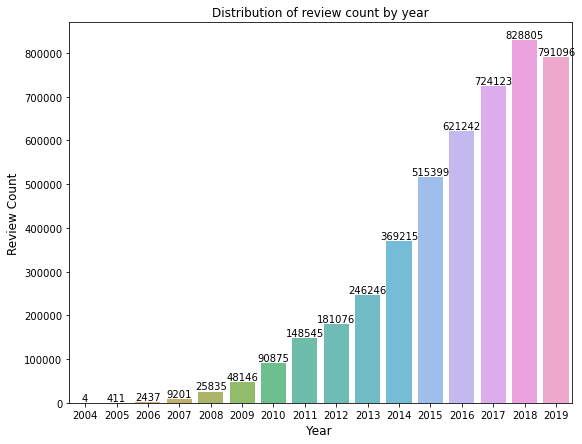

In [195]:
plt.figure(figsize=(9,7))
ax_review_by_year= sns.barplot(review_by_year.review_year, review_by_year.review_id, alpha=0.8)
plt.title("Distribution of review count by year")
plt.ylabel('Review Count', fontsize=12)
plt.xlabel('Year ', fontsize=12)

#adding the text labels
rects = ax_review_by_year.patches
labels = review_by_year.review_id
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_review_by_year.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [196]:
restaurant_review_df['review_text_length'] = restaurant_review_df['text'].apply(len)


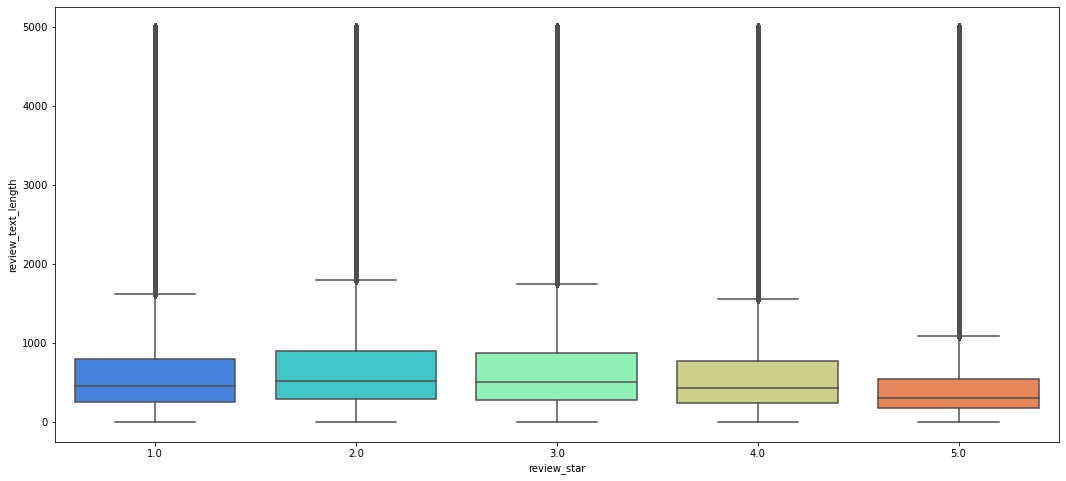

In [197]:
sns.boxplot(x='review_star',y='review_text_length',data=restaurant_review_df,palette='rainbow')


In [198]:
restaurant_review_df.head(1)

,index,business_id,name,city,state,latitude,longitude,business_avg_star,review_count,categories,review_id,user_id,review_star,useful,funny,cool,text,date,review_year,review_text_length
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",2TtLt9skrBwBM6QGEhFYCg,eSQ3z93DlzkpXK_H6MFEMw,5.0,0,0,0,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15,2013,171


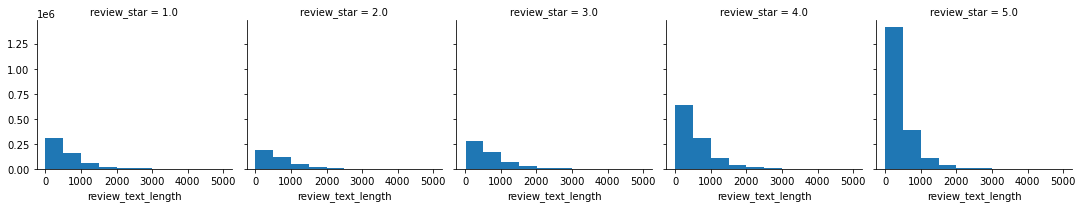

In [199]:
#visualize tip_text_length under different ratings (1-5)
text_length_in_different_ratings = sns.FacetGrid(restaurant_review_df,col='review_star')
text_length_in_different_ratings.map(plt.hist,'review_text_length')

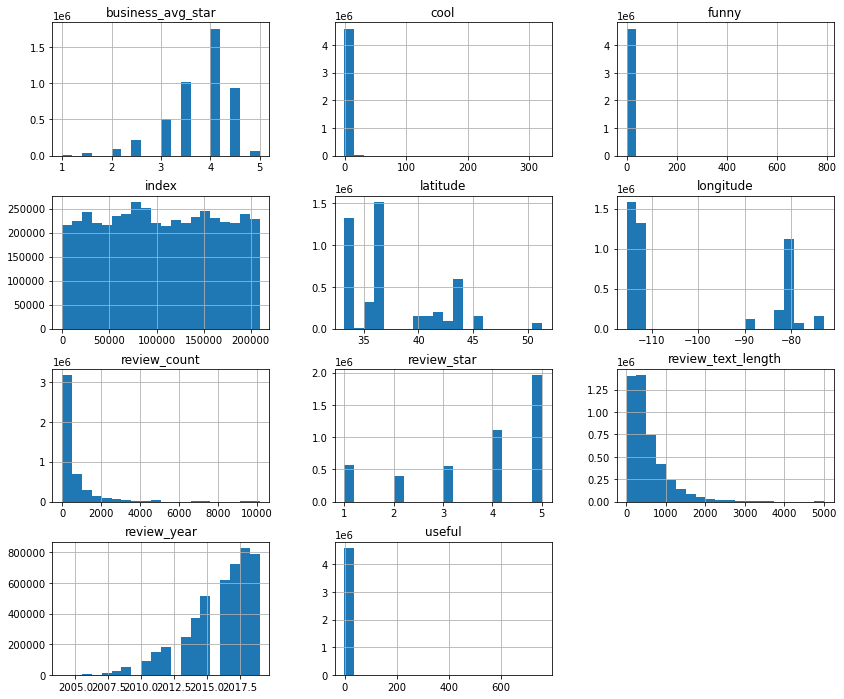

In [200]:
restaurant_review_df.hist(bins=20, figsize=(14,12))
plt.show()

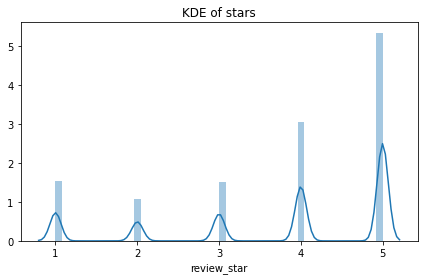

In [201]:
#Kernel Density Estimation (KDE) of review star
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(restaurant_review_df['review_star']).set_title('KDE of stars') #Kernel Density Estimation (KDE)
plt.tight_layout();

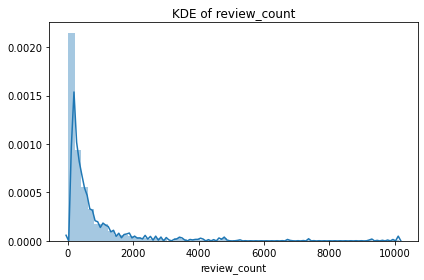

In [202]:
#Kernel Density Estimation (KDE) of review_count
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(restaurant_review_df['review_count']).set_title('KDE of review_count') #Kernel Density Estimation (KDE)
plt.tight_layout()

In [203]:
#find which business have most review
restaurant_with_most_reviews = restaurant_review_df['name'].value_counts().sort_values(ascending = False).iloc[0:10]

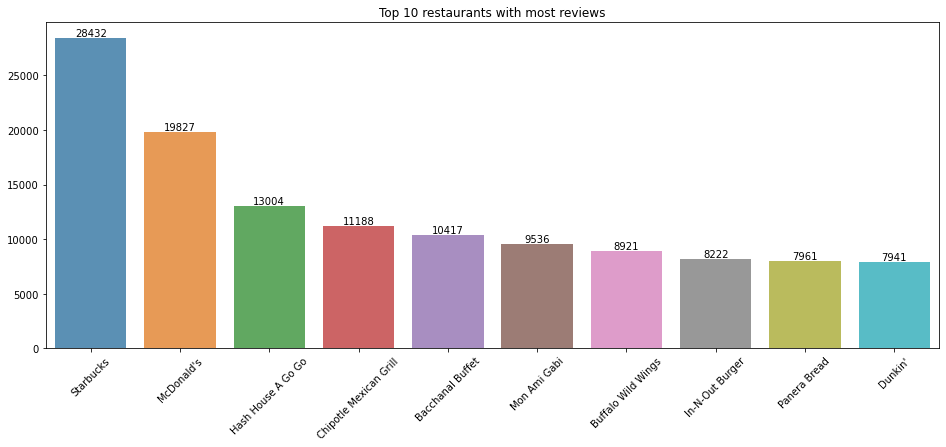

In [204]:
plt.figure(figsize=(16,6))
ax_restaurant_with_most_reviews = sns.barplot(restaurant_with_most_reviews.index, restaurant_with_most_reviews.values, alpha=0.8)
ax_restaurant_with_most_reviews.set_title("Top 10 restaurants with most reviews")
locs, labels = plt.xticks()

rects = ax_restaurant_with_most_reviews.patches
labels = restaurant_with_most_reviews.values
plt.setp(ax_restaurant_with_most_reviews.get_xticklabels(), rotation=45)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_restaurant_with_most_reviews.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

plt.show()

In [205]:
restaurant_review_df.head(2)

,index,business_id,name,city,state,latitude,longitude,business_avg_star,review_count,categories,review_id,user_id,review_star,useful,funny,cool,text,date,review_year,review_text_length
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",2TtLt9skrBwBM6QGEhFYCg,eSQ3z93DlzkpXK_H6MFEMw,5.0,0,0,0,I love the empanadas from the Empanadas House!...,2013-04-11 18:36:15,2013,171
1,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,champaign,IL,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo...",G16jgK2n4QgEfAr4YIs0iA,5So3uZiWDmow4eG8Va0WhQ,5.0,0,0,0,I ordered feta cheese and spinach empanadas an...,2017-09-21 17:45:53,2017,311


In [206]:
a=

SyntaxError: invalid syntax (<ipython-input-206-2d920c342ece>, line 1)

In [ ]:
#save to csv
restaurant_review_df.to_csv('./cleaned_csv/restaurant_review_df.csv', encoding='utf-8', index=False)
